# Feature Selection

There are two main feature selections Techniques:
- Unsupervised
- Supervised

Here we focus on Supervised techniques:
- Intrinsic: use the algorithm itself to ranking the features (example: RandomForest)
- Wrapper Methods: search for well-performing subsets of features (RFE)
- Filter: Select subsets of features based on their relationship with the target

## Filter

With the filter techniques we have also to consider if our input and output features are categorical or numerical:
- Numerical Input -> Numerical Output: 
    - Pearson’s correlation coefficient (linear correlation): f_regression()
    - Spearman’s rank coefficient (nonlinear correlation):
    <p>
- Numerical Input -> Categorical Output:
    - ANOVA correlation coefficient (linear correlation):  f_classif()
    - Kendall’s rank coefficient (nonlinear correlation):
    <p>
- Categorical Input -> Numerical Output:
    - ANOVA correlation coefficient (linear correlation): f_classif()
    - Kendall’s rank coefficient (nonlinear correlation):
    <p>
- Categorical Input -> Categorical Output:
    - Chi-Squared test (contingency tables): chi2()
    - Mutual Information: mutual_info_classif() and mutual_info_regression()
    <p>

In sklearn we use sklearn.feature_selection.SelectKBest.
<br>
An example:

In [1]:
# example of pearson's correlation
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# generate dataset
X, y = make_regression(n_samples=100, n_features=50, n_informative=5)
# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(100, 10)


### Example on Boston Housing Dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_squared_error
from pprint import pprint

In [3]:
boston_housing = pd.read_csv('datasets/boston_housing/BostonHousing.csv')
boston_housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
boston_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
training_data_reg = boston_housing.sample(frac=0.7, random_state=1234)
data_without_train_reg = boston_housing.drop(training_data_reg.index)
validation_data_reg = data_without_train_reg.sample(frac=0.5, random_state=27)
test_data_reg = data_without_train_reg.drop(validation_data_reg.index)

In [6]:
print(f'Dataset split:\ntraining data: {(len(training_data_reg))}\nvalidation data: {(len(validation_data_reg))}\ntest data: {(len(test_data_reg))}')

Dataset split:
training data: 354
validation data: 76
test data: 76


#### Features and Target preparation

In [7]:
# target training and validation
                
yreg = training_data_reg['medv'] # Target of training set
yreg_val = validation_data_reg['medv'] # Target of validation set
yreg.head()

64     33.0
100    27.5
400     5.6
485    21.2
454    14.9
Name: medv, dtype: float64

In [8]:
# the features vector

features_reg = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']

Xreg = training_data_reg[features_reg]
Xreg_val = validation_data_reg[features_reg]
Xreg.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05
100,0.14866,0.0,8.56,0,0.5200,6.727,79.9,2.7778,5,384,20.9,394.76,9.42
400,25.04610,0.0,18.10,0,0.6930,5.987,100.0,1.5888,24,666,20.2,396.90,26.77
485,3.67367,0.0,18.10,0,0.5830,6.312,51.9,3.9917,24,666,20.2,388.62,10.58
454,9.51363,0.0,18.10,0,0.7130,6.728,94.1,2.4961,24,666,20.2,6.68,18.71


### Apply Feature Selection

In [9]:
# f: features, num: numerical, cat: categorical

from sklearn.linear_model import ElasticNet

model_f_num = ElasticNet()
model_f_num_cat = ElasticNet()
model_f_all = ElasticNet()

In [10]:
# use pearson's on numerical features and ANOVA on categorical features to select the features

X_num = Xreg.drop(['chas', 'rad'], axis='columns')
X_num_val = Xreg_val.drop(['chas', 'rad'], axis='columns')
X_num.columns

Index(['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'b',
       'lstat'],
      dtype='object')

#### Numerical Feature Selection

In [11]:
fs_num = SelectKBest(score_func=f_regression, k=3).fit(X_num, yreg)
f_num = pd.Series(fs_num.scores_, index=X_num.columns)
f_num

crim        90.982427
zn          52.151470
indus      143.884044
nox        100.149580
rm         472.477717
age         73.615827
dis         30.801513
tax        141.287811
ptratio    164.906883
b           52.488507
lstat      460.118857
dtype: float64

<AxesSubplot:>

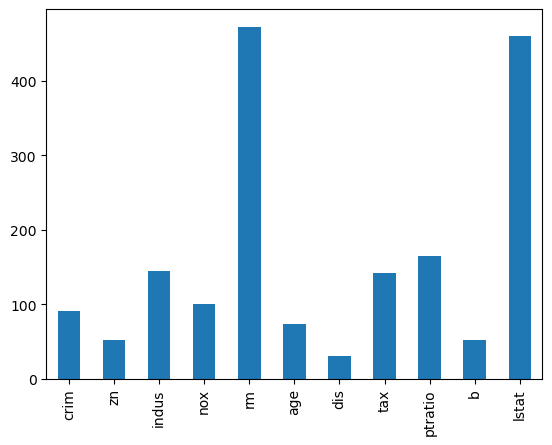

In [12]:
from matplotlib import pyplot

f_num.plot(kind='bar')

#### Categorical Feature Selection

In [13]:
X_cat = Xreg[['chas', 'rad']]
X_cat.columns

Index(['chas', 'rad'], dtype='object')

In [14]:
from sklearn.feature_selection import f_classif

fs_cat = SelectKBest(score_func=f_classif, k=2).fit(X_cat, yreg)
f_cat = pd.Series(fs_cat.scores_, index=X_cat.columns)
f_cat

chas    0.980847
rad     2.000062
dtype: float64

<AxesSubplot:>

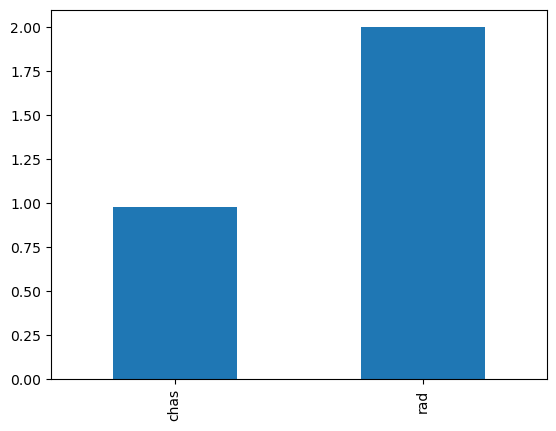

In [15]:
f_cat.plot(kind='bar')

### Compare Models with Different Features

#### Selected Numerical Features Only Model

In [16]:
# We extract the columns indexes from the support
# Then selected the new features from the dataframe columns

cols_idxs_num = fs_num.get_support(indices=True)
new_features = X_num.iloc[:,cols_idxs_num].columns
Xreg[new_features].head(2)

,rm,ptratio,lstat
64,7.104,18.6,8.05
100,6.727,20.9,9.42


In [17]:
model_f_num.fit(Xreg[new_features], yreg)
preds_num = model_f_num.predict(Xreg_val[new_features])
r2_score(yreg_val, preds_num)

0.46183922841139835

#### Selected Numerical and Categorical Features Model

In [18]:
cols_idxs_num = fs_num.get_support(indices=True)
cols_idxs_cat = fs_cat.get_support(indices=True)
new_features_num = X_num.iloc[:,cols_idxs_num].columns
new_features_cat = X_cat.iloc[:,cols_idxs_cat].columns
new_features_num_cat = new_features_num.union(new_features_cat)
Xreg[new_features_num_cat].head(2)

,chas,lstat,ptratio,rad,rm
64,0,8.05,18.6,3,7.104
100,0,9.42,20.9,5,6.727


In [19]:
model_f_num_cat.fit(Xreg[new_features_num_cat], yreg)
preds_num_cat = model_f_num_cat.predict(Xreg_val[new_features_num_cat])
r2_score(yreg_val, preds_num_cat)

0.4495520911741152

#### All Features Model

In [20]:
model_f_all.fit(Xreg, yreg)
preds_all = model_f_all.predict(Xreg_val)
r2_score(yreg_val, preds_all)

0.47673568102491004

## Wrapper Method: RFE

In [21]:
from sklearn.linear_model import ElasticNet

model_rfe = ElasticNet()
model_f_all = ElasticNet()

In [22]:
from sklearn.feature_selection import RFE

selector = RFE(model_rfe, n_features_to_select=3, step=1)
selector = selector.fit(Xreg, yreg)
selector.ranking_

array([ 4,  5,  3, 11, 10,  1,  8,  2,  6,  7,  1,  9,  1])

In [23]:
cols_idxs_rfe = selector.get_support(indices=True)
new_features_rfe = Xreg.iloc[:,cols_idxs_rfe].columns
Xreg[new_features_rfe].head(2)

,rm,ptratio,lstat
64,7.104,18.6,8.05
100,6.727,20.9,9.42


In [24]:
model_rfe.fit(Xreg[new_features_rfe], yreg)
preds_rfe = model_rfe.predict(Xreg_val[new_features_rfe])
r2_score(yreg_val, preds_rfe)

0.46183922841139835

In [25]:
# all feature model

model_f_all.fit(Xreg, yreg)
preds = model_f_all.predict(Xreg_val)
r2_score(yreg_val, preds)

0.47673568102491004

## Intrinsic

### Random Forest Intrinsic Feature Selection

In [26]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(Xreg, yreg)
preds_rf = model_rf.predict(Xreg_val)
r2_score(yreg_val, preds_rf)

0.6448838545857681

In [27]:
features_importance = model_rf.feature_importances_
features_importance = pd.Series(features_importance, index=Xreg.columns)
features_importance.sort_values(ascending=False)

rm         0.569951
lstat      0.261480
crim       0.043369
nox        0.027712
dis        0.025127
ptratio    0.016285
tax        0.014849
age        0.013811
b          0.012010
rad        0.008342
indus      0.004987
zn         0.001104
chas       0.000974
dtype: float64

<AxesSubplot:>

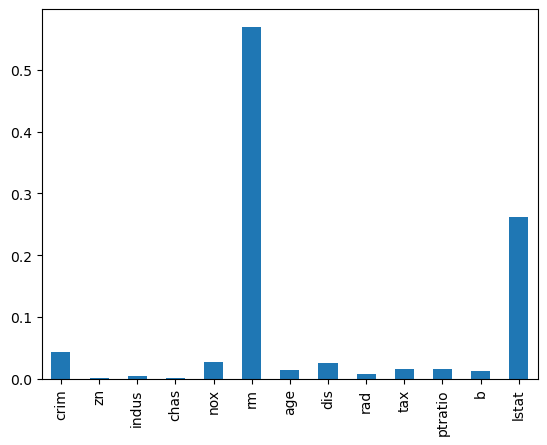

In [28]:
features_importance.plot(kind='bar')

In [29]:
new_features = ['rm', 'lstat', 'crim', 'nox', 'dis', 'ptratio']

X_new = training_data_reg[new_features]
X_new_val = validation_data_reg[new_features]
X_new.head(2)

,rm,lstat,crim,nox,dis,ptratio
64,7.104,8.05,0.01951,0.4161,9.2229,18.6
100,6.727,9.42,0.14866,0.5200,2.7778,20.9


In [30]:
model_rf_new_features = RandomForestRegressor()
model_rf_new_features.fit(X_new, yreg)
preds_rf_new_features = model_rf_new_features.predict(X_new_val)
r2_score(yreg_val, preds_rf_new_features)

0.6274129318055579

### Gradient Boosting Intrinsic Features Selection

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor()
model_gb.fit(Xreg, yreg)
preds_gb = model_gb.predict(Xreg_val)
r2_score(yreg_val, preds_gb)

0.6917926154610123

In [32]:
features_importance = model_gb.feature_importances_
features_importance = pd.Series(features_importance, index=Xreg.columns)
features_importance.sort_values(ascending=False)

rm         0.500353
lstat      0.317490
crim       0.043504
ptratio    0.036402
nox        0.030216
dis        0.025474
tax        0.017118
age        0.015750
b          0.008233
rad        0.003022
indus      0.001940
chas       0.000267
zn         0.000232
dtype: float64

<AxesSubplot:>

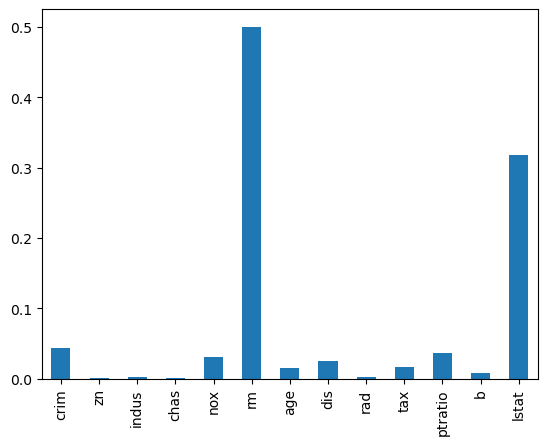

In [33]:
features_importance.plot(kind='bar')

In [34]:
new_features = ['rm', 'lstat', 'crim', 'ptratio', 'nox', 'dis']

X_new = training_data_reg[new_features]
X_new_val = validation_data_reg[new_features]
X_new.head(2)

,rm,lstat,crim,ptratio,nox,dis
64,7.104,8.05,0.01951,18.6,0.4161,9.2229
100,6.727,9.42,0.14866,20.9,0.5200,2.7778


In [35]:
model_gb_new_features = RandomForestRegressor()
model_gb_new_features.fit(X_new, yreg)
preds_gb_new_features = model_gb_new_features.predict(X_new_val)
r2_score(yreg_val, preds_gb_new_features)

0.6557215811323427